__Introduction__

Our objective is to creating an artificial neural network capable of classifying whether a customer leaves a bank or not with a high accuracy. We will use the features provide in the kaggle dataset (https://www.kaggle.com/datasets/filippoo/deep-learning-az-ann/data) to create the model. We will perform the following tasks for this project:
1. Importing the dataset and necessary libraries
2. Data Exploration
3. Data Cleaning and Feature Engineering
3. Data preprocessing
4. Model building
5. Prediction and model perfomance

__1. Importing the dataset and necessary libraries__


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/sample_data/Churn_Modelling.csv")

# New Section

__2. Data Exploration__

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

The dataset has 1000 observations which are 1000 customer and 14 columns.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
data.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
data.duplicated().sum()

0

So, there are no duplicates.

In [ ]:
 data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no null values in any column.

<Axes: xlabel='Exited', ylabel='count'>

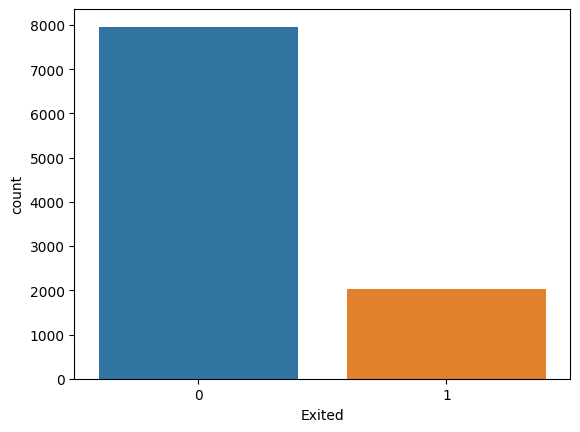

In [ ]:
sns.countplot(data,x='Exited')

This counplot shows that the bank was able to retain majority of its customers.

<ipython-input-12-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

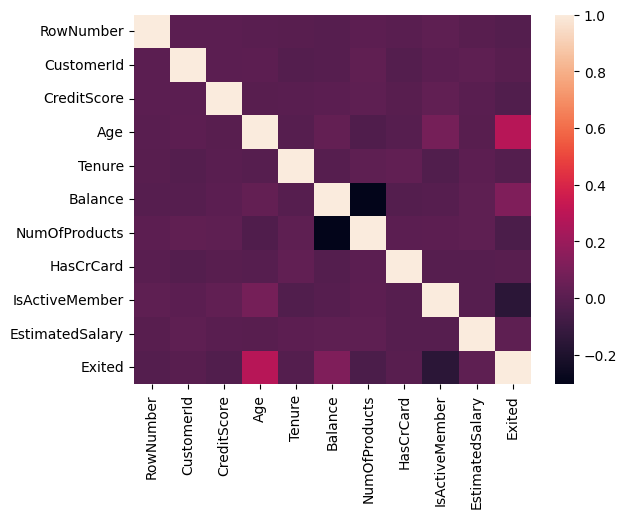

In [ ]:
sns.heatmap(data.corr())

_The columns do not seem to have significant linear relationship with the outcome variable. Artificial neural networks are useful in these cases as they can capture complex and non-linear relationships between input features and the target variable._

__3.Data Cleaning and Feature Engineering__

Lets go more indepth to understand the relationship between the features and our outcome variable 'Exited'.
First, we need to get rid of unnecessary columns. We will drop columns _RowNumber_, _CustomerId_  and _Surname_ as they are irrelevant in predicting the outcome. [link text](https://)

In [ ]:
data.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True,axis=1)


In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 ***Label Encoding***

We will use labelEncoder function to convert our catergorical variables into numerical variables.

In [ ]:
le = LabelEncoder()
data["Geography"] = le.fit_transform(data["Geography"])
data["Gender"] = le.fit_transform(data["Gender"])

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


__4.Data Preprocessing__

Before creating the model, we need to split the data into training and testing sets.


In [ ]:
X = data.drop("Exited",axis=1)
y = data["Exited"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)

In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9665,547,0,1,30,6,0.00,2,1,1,18471.86
55,619,0,1,43,1,125211.92,1,1,1,113410.49
341,659,0,1,31,4,118342.26,1,0,0,161574.19
154,614,0,0,43,6,0.00,2,1,1,109041.53
1434,552,0,0,41,9,124349.34,1,1,0,135635.25
...,...,...,...,...,...,...,...,...,...,...
5317,700,0,1,37,1,135179.49,1,1,0,160670.37
5073,644,1,1,34,9,112746.54,2,0,0,141230.07
3512,806,2,1,18,3,0.00,2,1,1,86994.54
1132,628,0,1,37,0,0.00,2,1,1,171707.93


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

***Scaling***

For optimal results, it is necessary that our data is normalized or scaled. If the data is not normalized, some columns will have greater influence than others.

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[0.394     , 0.        , 1.        , ..., 1.        , 1.        ,
        0.09232829],
       [0.538     , 0.        , 1.        , ..., 1.        , 1.        ,
        0.56715974],
       [0.618     , 0.        , 1.        , ..., 0.        , 0.        ,
        0.80804839],
       ...,
       [0.912     , 1.        , 1.        , ..., 1.        , 1.        ,
        0.43504151],
       [0.556     , 0.        , 1.        , ..., 1.        , 1.        ,
        0.85873186],
       [0.606     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.83278945]])

__5.Model Building__

We have scaled the data and split the set into training and training sets. Now we are able to create our ANN model.

In [ ]:
model  = Sequential()


Now, lets add the layers to the ann model.

In [ ]:
model.add(Dense(12,activation='relu',input_dim =10))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))


We will train the model.

In [ ]:
model.compile (loss = 'binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])

In [ ]:
Model = model.fit(X_train,y_train,epochs =50,batch_size = 32)
Model

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8611
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8596
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8609
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8627
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8586
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8635
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8646
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8622
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8629
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8619

__6.Prediction__


In [ ]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8445


We have an accuracy of 84.45% which is pretty good.